<a href="https://colab.research.google.com/github/tolgaenginn/ergasia-3/blob/main/ergasia_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import yfinance as yf
from sklearn.linear_model import LinearRegression, BayesianRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, StackingRegressor
from sklearn.metrics import mean_absolute_error

#QUESTION 1

Create a single line plot with the y-axis representing each column’s price (open, high, low, close) and the x-axis representing the date.Use the Plotly library (🔗 https://plotly.com/python/line-charts/) so that the graph supports zooming. Also, increase the graph size for better readability.

In [ ]:
#data download and prep
ticker = "EURUSD=X"
data = yf.download(ticker, start="2020-01-01", end="2025-11-01", interval="1d")

if isinstance(data.columns, pd.MultiIndex):
    data.columns = [col[0] for col in data.columns]

data.reset_index(inplace=True)

print(data.head())


#Plotly
fig = go.Figure()

for col, color in zip(["Open", "High", "Low", "Close"],
                      ["yellow", "green", "red", "blue"]):
    fig.add_trace(go.Scatter(
        x=data["Date"], y=data[col],
        mode="lines", name=col, line=dict(color=color)
    ))

fig.update_layout(
    title="EUR/USD Exchange Rate (2020–2025)",
    xaxis_title="Date",
    yaxis_title="Price (USD per EUR)",
    width=1000, height=600,
    template="plotly_white",
    hovermode="x unified"
)

fig.show()

/tmp/ipython-input-4179134734.py:3: FutureWarning:

YF.download() has changed argument auto_adjust default to True

[*********************100%***********************]  1 of 1 completed


        Date     Close      High       Low      Open  Volume
0 2020-01-01  1.122083  1.122838  1.115947  1.122083       0
1 2020-01-02  1.122083  1.122712  1.116682  1.121894       0
2 2020-01-03  1.117144  1.118068  1.112570  1.117081       0
3 2020-01-06  1.116196  1.120825  1.115810  1.116246       0
4 2020-01-07  1.119799  1.119946  1.113487  1.119583       0


#QUESTION 2
From the line plot in question (1), do you observe that the time series are stationary or non-stationary? Justify your answer.


The time series are obviously non-stationary as visible from the graphic above. the features change and evolve throughout time.

#QUESTION 3
Suppose we train a Regressor on non-stationary time series.What potential problems might occur? Justify based on these specific data.

Regressors assumes that the realtionship between input and output remains the same. with non stationary time series this is not the case. the final model would be unreliable

#QUESTION 4

What do you observe about the trend of the dollar between June and July 2025?Search for and mention possible reasons explaining this trend.

In [ ]:
mask = (data['Date'] >= '2025-06-01') & (data['Date'] <= '2025-07-31')
subset = data.loc[mask]

fig = px.line(subset, x='Date', y='Close',
              title='EUR/USD Exchange Rate (June–July 2025)',
              markers=True)
fig.update_layout(width=900, height=500, template='plotly_white')
fig.show()

subset.describe()



,Date,Close,High,Low,Open,Volume,Month,Day,Open_logret,High_logret,Low_logret,Close_logret
count,44,44.000000,44.000000,44.000000,44.000000,44.0,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000
mean,2025-07-01 07:38:10.909090816,1.160960,1.164343,1.156933,1.160960,0.0,6.522727,15.636364,0.000102,0.000139,0.000184,0.000102
min,2025-06-02 00:00:00,1.135332,1.143458,1.135589,1.135332,0.0,6.000000,1.000000,-0.013708,-0.014525,-0.008359,-0.013708
25%,2025-06-16 18:00:00,1.149631,1.153343,1.145840,1.149631,0.0,6.000000,8.750000,-0.002260,-0.002253,-0.002700,-0.002260
50%,2025-07-01 12:00:00,1.161386,1.165273,1.158695,1.161386,0.0,7.000000,16.000000,0.000311,0.000271,0.000105,0.000311
75%,2025-07-16 06:00:00,1.172838,1.175130,1.168439,1.172838,0.0,7.000000,23.250000,0.002992,0.002811,0.002764,0.002992
max,2025-07-31 00:00:00,1.180554,1.183026,1.176775,1.180554,0.0,7.000000,31.000000,0.008781,0.011918,0.011058,0.008781
std,NaN,0.013255,0.012591,0.012989,0.013255,0.0,0.505258,9.006692,0.004596,0.004600,0.004007,0.004596


Until 28th july the rate went up after that date euro lost value against dollar. this might be due to economic as well as political reasons such as european central bank printing more money.


#QUESTION 5
Is it possible to predict the next day’s closing price if we know today’s open, high, low, and close?Alternatively, is it possible to find such a function? Justify your answer.

no its not possible otherwise by knowing the future everyone would be rich which is not feasible. its possible to predict it however by developing a model. however thats also quite difficult and depends on trading strategy. an all correct function doesnt exist in stock market but for many individual cases its possible to rooughly predict prices.

#QUESTION 6

Does it make sense to randomly split the data into train-test sets? Explain why or why not.

no the time series are very important as the model needs to learn the sequential data. randomly mixing past data woulndt be logical.

#QUESTION 7

Split the dataset into train and test DataFrames:

-Train: all data before 2024

-Test: all data from 2024Then, remove the Date column from both DataFrames.

In [ ]:
train_df = data[data['Date'] < '2024-01-01'].copy()
test_df  = data[data['Date'] >= '2024-01-01'].copy()

train_df.drop(columns=['Date'], inplace=True)
test_df.drop(columns=['Date'], inplace=True)

print("Train set shape:", train_df.shape)
print("Test  set shape:", test_df.shape)

print("\nTrain range from", data.loc[data['Date'] < '2024-01-01', 'Date'].min(), "until", data.loc[data['Date'] < '2024-01-01', 'Date'].max())
print("Test  range from", data.loc[data['Date'] >= '2024-01-01', 'Date'].min(), "until", data.loc[data['Date'] >= '2024-01-01', 'Date'].max())

Train set shape: (1043, 5)
Test  set shape: (477, 5)

Train range from 2020-01-01 00:00:00 until 2023-12-29 00:00:00
Test  range from 2024-01-01 00:00:00 until 2025-10-31 00:00:00


#QUESTION 8

In [ ]:
def create_timeframes(df, N):
    df = df.dropna().reset_index(drop=True)

    values = df[['Open', 'High', 'Low', 'Close']].values
    targets = df['Close'].shift(-1).values

    x, y = [], []

    for i in range(len(values) - N):
        x.append(values[i:i+N])
        y.append(targets[i+N-1])

    return np.array(x), np.array(y)


#QUESTION 9

If we want to predict the next day, should the timeframe size be small or large?What do you recommend for the value of if we want to predict a longer horizon (e.g., one month)? Justify your answer.

for shorter horizon small timeframe. it would capture the latest momentum better. however for a longer horizon large timeframe would be better as it would get information more consistent and show the general trend more efficiently.

#QUESTION 10


In [ ]:
#timeframes with N = 5
x_train, y_train = create_timeframes(train_df, 5)
x_test,  y_test  = create_timeframes(test_df, 5)

x_train = x_train.reshape(x_train.shape[0], 5 * 4)
x_test  = x_test.reshape(x_test.shape[0],  5 * 4)

#verify
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_test shape:",  x_test.shape)
print("y_test shape:",  y_test.shape)

print("\n First input vector (x_train[0]):")
print(x_train[0])

x_train shape: (1038, 20)
y_train shape: (1038,)
x_test shape: (472, 20)
y_test shape: (472,)

 First input vector (x_train[0]):
[1.12208259 1.1228385  1.11594689 1.12208259 1.12189376 1.12271249
 1.11668205 1.12208259 1.11708128 1.11806798 1.11256981 1.11714375
 1.11624587 1.12082493 1.11580992 1.11619604 1.11958253 1.11994624
 1.11348653 1.11979949]


#QUESTION 11

If we want to predict the next day, should the timeframe size N be small or large?What do you recommend for N if we want to predict a longer horizon (e.g., one month)?Justify your answer.

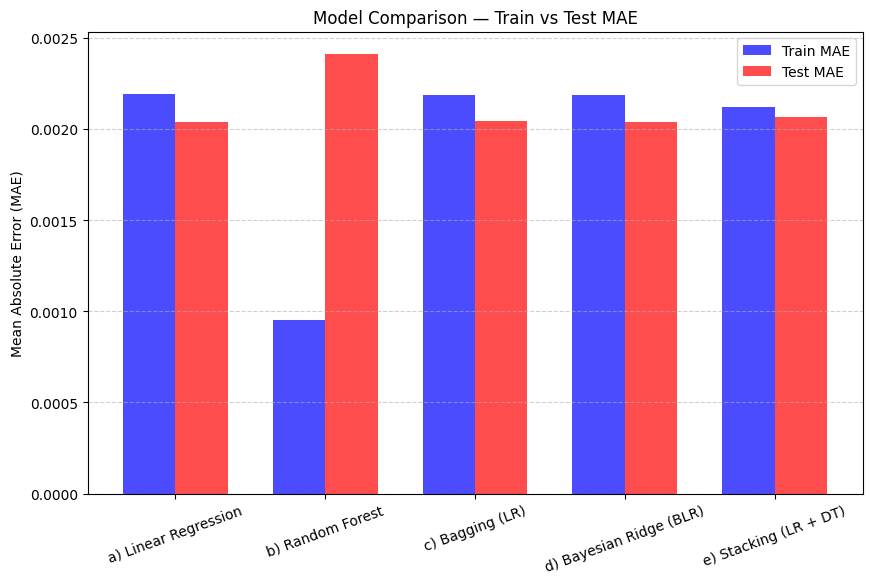

a) Linear Regression            Train MAE: 0.002192   Test MAE: 0.002038
b) Random Forest                Train MAE: 0.000953   Test MAE: 0.002415
c) Bagging (LR)                 Train MAE: 0.002190   Test MAE: 0.002042
d) Bayesian Ridge (BLR)         Train MAE: 0.002190   Test MAE: 0.002039
e) Stacking (LR + DT)           Train MAE: 0.002124   Test MAE: 0.002065


In [ ]:

# models
models = {
    "a) Linear Regression": LinearRegression(),
    "b) Random Forest": RandomForestRegressor(random_state=0, n_estimators=100),
    "c) Bagging (LR)": BaggingRegressor(estimator=LinearRegression(), n_estimators=50, random_state=0),
    "d) Bayesian Ridge (BLR)": BayesianRidge(),
    "e) Stacking (LR + DT)": StackingRegressor(
        estimators=[
            ('lr', LinearRegression()),
            ('dt', DecisionTreeRegressor(max_depth=5))
        ],
        final_estimator=LinearRegression()
    )
}


results = {"Model": [], "MAE_Train": [], "MAE_Test": []}

for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred_train = model.predict(x_train)
    y_pred_test  = model.predict(x_test)

    mae_train = mean_absolute_error(y_train, y_pred_train)
    mae_test  = mean_absolute_error(y_test,  y_pred_test)

    results["Model"].append(name)
    results["MAE_Train"].append(mae_train)
    results["MAE_Test"].append(mae_test)


models_list = results["Model"]
mae_train = results["MAE_Train"]
mae_test  = results["MAE_Test"]


x = np.arange(len(models_list))
width = 0.35

plt.figure(figsize=(10,6))
plt.bar(x - width/2, mae_train, width, label='Train MAE', color='blue', alpha=0.7)
plt.bar(x + width/2, mae_test,  width, label='Test MAE',  color='red', alpha=0.7)
plt.xticks(x, models_list, rotation=20)
plt.ylabel("Mean Absolute Error (MAE)")
plt.title("Model Comparison — Train vs Test MAE")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


for i in range(len(models_list)):
    print(f"{models_list[i]:30s}  Train MAE: {mae_train[i]:.6f}   Test MAE: {mae_test[i]:.6f}")


#QUESTION 12


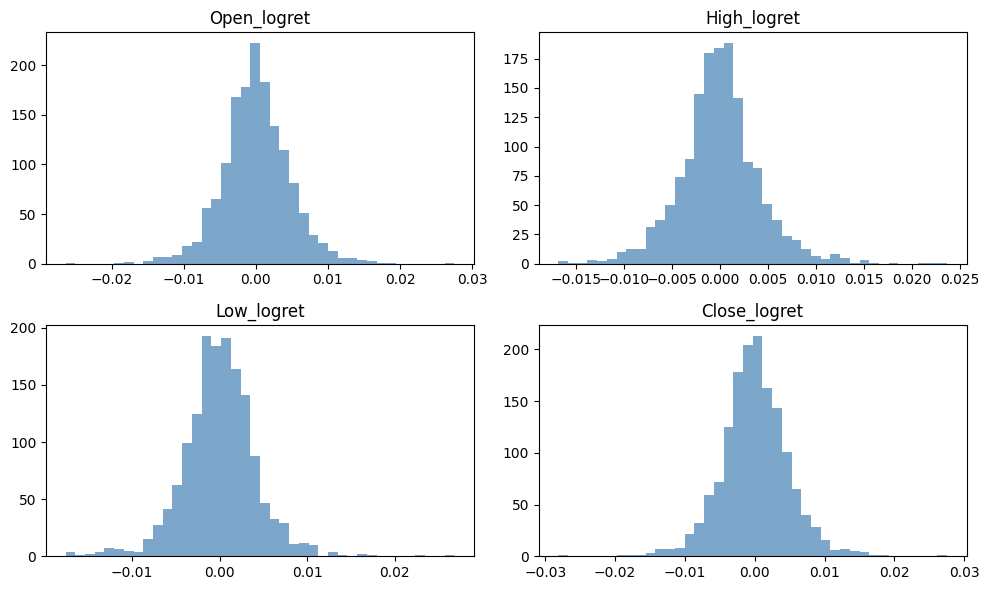

x_train: (1033, 5, 4)  y_train: (1033,)
x_test: (472, 5, 4)  y_test: (472,)


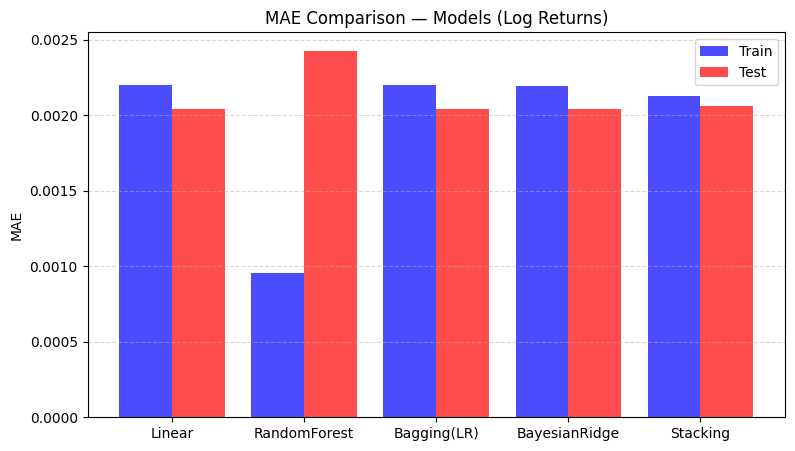

Linear                Train MAE: 0.002196   Test MAE: 0.002038
RandomForest          Train MAE: 0.000958   Test MAE: 0.002427
Bagging(LR)           Train MAE: 0.002196   Test MAE: 0.002040
BayesianRidge         Train MAE: 0.002195   Test MAE: 0.002039
Stacking              Train MAE: 0.002130   Test MAE: 0.002063


In [ ]:

data["Month"] = data["Date"].dt.month
data["Day"]   = data["Date"].dt.day

for col in ["Open", "High", "Low", "Close"]:
    data[f"{col}_logret"] = np.log(data[col] / data[col].shift(1))

data.dropna(inplace=True)

cols = ["Open_logret", "High_logret", "Low_logret", "Close_logret"]
fig, axes = plt.subplots(2, 2, figsize=(10,6))
for i, col in enumerate(cols):
    ax = axes.flat[i]
    ax.hist(data[col], bins=40, color='steelblue', alpha=0.7)
    ax.set_title(col)
plt.tight_layout()
plt.show()

train_df = data[data['Date'] < '2024-01-01'].copy()
test_df  = data[data['Date'] >= '2024-01-01'].copy()
train_df.drop(columns=['Date'], inplace=True)
test_df.drop(columns=['Date'], inplace=True)

def create_timeframes(df, N):
    df = df.dropna().reset_index(drop=True)
    if len(df) <= N:
        print("Not enough data for timeframe creation")
        return np.array([]), np.array([])
    values = df[['Open_logret', 'High_logret', 'Low_logret', 'Close_logret']].values
    targets = df['Close_logret'].shift(-1).values
    x, y = [], []
    for i in range(len(values) - N):
        x.append(values[i:i+N])
        y.append(targets[i+N-1])
    return np.array(x), np.array(y)

x_train, y_train = create_timeframes(train_df, 5)
x_test,  y_test  = create_timeframes(test_df, 5)

print("x_train:", x_train.shape, " y_train:", y_train.shape)
print("x_test:", x_test.shape, " y_test:", y_test.shape)

if len(x_train) > 0:
    x_train = x_train.reshape(x_train.shape[0], 5*4)
    x_test  = x_test.reshape(x_test.shape[0], 5*4)

    models = {
        "Linear": LinearRegression(),
        "RandomForest": RandomForestRegressor(random_state=0, n_estimators=100),
        "Bagging(LR)": BaggingRegressor(estimator=LinearRegression(), n_estimators=50, random_state=0),
        "BayesianRidge": BayesianRidge(),
        "Stacking": StackingRegressor(
            estimators=[('lr', LinearRegression()), ('dt', DecisionTreeRegressor(max_depth=5))],
            final_estimator=LinearRegression()
        )
    }

    results = {"Model": [], "MAE_Train": [], "MAE_Test": []}

    for name, model in models.items():
        model.fit(x_train, y_train)
        y_pred_train = model.predict(x_train)
        y_pred_test  = model.predict(x_test)
        results["Model"].append(name)
        results["MAE_Train"].append(mean_absolute_error(y_train, y_pred_train))
        results["MAE_Test"].append(mean_absolute_error(y_test, y_pred_test))

    # Plot comparison
    plt.figure(figsize=(9,5))
    x = np.arange(len(results["Model"]))
    plt.bar(x-0.2, results["MAE_Train"], width=0.4, label="Train", color='blue', alpha=0.7)
    plt.bar(x+0.2, results["MAE_Test"],  width=0.4, label="Test",  color='red', alpha=0.7)
    plt.xticks(x, results["Model"])
    plt.ylabel("MAE")
    plt.title("MAE Comparison — Models (Log Returns)")
    plt.legend()
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    plt.show()

    for i in range(len(results["Model"])):
        print(f"{results['Model'][i]:20s}  Train MAE: {results['MAE_Train'][i]:.6f}   Test MAE: {results['MAE_Test'][i]:.6f}")
else:
    print("No data to train. Check log-return calculation.")


#QUESTION 13

best model based on Test MAE: Linear


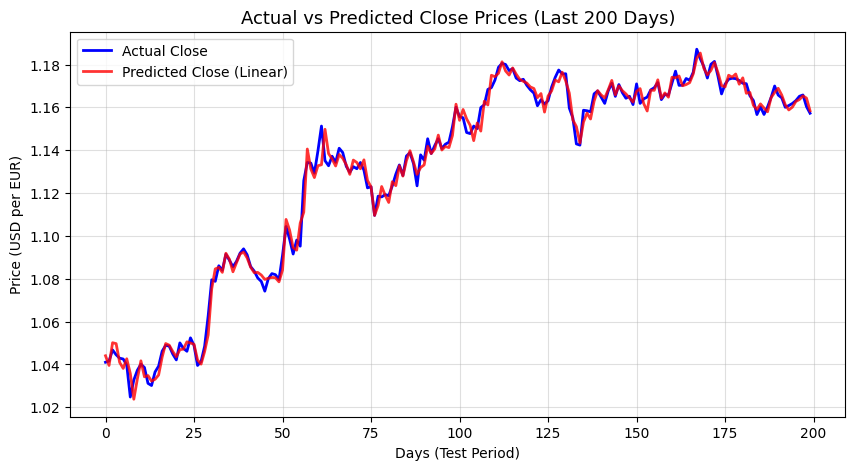

Absolute MAE between actual and predicted Close prices: 0.002242


In [ ]:

#Pick best model
best_model_name = min(results["Model"], key=lambda m: results["MAE_Test"][results["Model"].index(m)])
print(f"best model based on Test MAE: {best_model_name}")
best_model = list(models.values())[results["Model"].index(best_model_name)]

y_pred_test = best_model.predict(x_test)

true_close = test_df["Close"].values[5:]
prev_close = test_df["Close"].values[4:-1]

pred_close = prev_close * np.exp(y_pred_test)

plt.figure(figsize=(10, 5))
plt.plot(true_close[-200:], label="Actual Close", color='blue', linewidth=2)
plt.plot(pred_close[-200:], label=f"Predicted Close ({best_model_name})",
         color='red', linewidth=2, alpha=0.8)
plt.title("Actual vs Predicted Close Prices (Last 200 Days)", fontsize=13)
plt.xlabel("Days (Test Period)")
plt.ylabel("Price (USD per EUR)")
plt.legend()
plt.grid(alpha=0.4)
plt.show()

mae_abs = mean_absolute_error(true_close, pred_close)
print(f"Absolute MAE between actual and predicted Close prices: {mae_abs:.6f}")
